In [2]:
import pandas as pd

print("开始读入数据")

# 读入文件
features = pd.read_csv(r'F:\jupyter_notebook\Data\数据集\6组数据(处理完异常值，不带NA)\continent_num.csv')
# 展示前五行
display(features.head(5))
print("读入数据完成===========================")

开始读入数据


,OTU_40,OTU_12,OTU_1998,OTU_318,OTU_1132,OTU_49,OTU_68,OTU_271,OTU_194,OTU_70,...,OTU_6110,OTU_38361,OTU_40330,OTU_41286,OTU_35245,OTU_3157,OTU_77,OTU_22607,OTU_5801,Continent
0,20,28,6,0,0,48,54,0,3,1,...,0,0,0,2,0,0,0,0,0,0
1,21,24,5,0,0,122,87,5,6,2,...,0,0,0,2,0,0,0,0,0,0
2,12,17,3,0,2,65,73,2,2,1,...,0,0,0,0,0,0,0,0,0,0
3,14,26,6,0,1,64,57,2,1,1,...,0,0,0,2,0,0,0,0,1,0
4,10,30,3,0,2,62,70,1,2,1,...,2,0,0,1,0,0,0,0,0,0


读入数据完成===========================


In [3]:
#==============================================
# 这里表示取得标签这一列

# Use numpy to convert to arrays
import numpy as np
# label表示ph值，即是 y标签
# np.array() 表示创建一个数组
labels = features['Continent']
# 展示标签值
print(labels)
print("获取标签数据完成==============================================")
features= features.drop('Continent', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
print("删除标签列完成==============================================")


0       0
1       0
2       0
3       0
4       0
       ..
1181    5
1182    5
1183    5
1184    5
1185    5
Name: Continent, Length: 1186, dtype: int64
获取标签数据完成==============================================
删除标签列完成==============================================


In [4]:
#转换成数组
features_array = np.array(features)
print(features_array)
print(features_array.shape)

from sklearn.model_selection import train_test_split
 
# Split the data into training and testing sets
# 这里划分数据集的时候，两个输入和标签 都应该是数组，在前面的代码 已经把features和labels 转换成数组了
train_features, test_features, train_labels, test_labels = train_test_split(features_array,labels, test_size = 0.25,random_state = 42,stratify=labels )
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

print("划分数据集和测试集完成==============================================")

[[20 28  6 ...  0  0  0]
 [21 24  5 ...  0  0  0]
 [12 17  3 ...  0  0  0]
 ...
 [33  4  0 ...  0  0  0]
 [25 14  0 ...  0  0  0]
 [40  7  0 ...  0  0  0]]
(1186, 4869)
Training Features Shape: (889, 4869)
Training Labels Shape: (889,)
Testing Features Shape: (297, 4869)
Testing Labels Shape: (297,)
划分数据集和测试集完成==============================================


In [5]:
#=====================================================================================================================
# 这一部分是用来进行训练随机森林的

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
 
print("开始训练模型")
# Instantiate model 
# RandomForestRegressor() 参数 n_estimators 是表示决策树的个数，
# 一般来说n_estimators太小，容易过拟合，n_estimators太大，又容易欠拟合，一般选择一个适中的数值默认是100
# bootstrap=True： 是否有放回的采样。
# RF的分类器是RandomForestClassifier，回归器是RandomForestRegressor
# max_depth  int：深度  None：树会生长到所有叶子都分到一个类，或者某节点所代表的样本数已小于min_samples_split

rf = RandomForestClassifier(n_estimators= 100, random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels)
print("训练模型结束==============================================")
#=====================================================================================================================
# 这部分相当于是用来检测训练的正确率的
# Use the forest's predict method on the test data
# 预测函数
predictions = rf.predict(test_features)
print("预测完成！==============================================")

# 计算随机森林得分
score = rf.score(test_features, test_labels)
print('随机森林模型得分:', score)

开始训练模型
训练模型结束==============================================
预测完成！==============================================
随机森林模型得分: 0.98989898989899


In [6]:
#=====================================================================================================================
#上面是对重要性进行数字来表示，这里呢 就是对特征的重要性进行柱状图来进行表示

#=====================================================================================================================
# 特征的重要性进行评估
Graph_X_OTU = []
Graph_Y_importance = []

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_features.shape[1]):
    
    print("%2d) %-*s %f" % (f + 1, 30, feature_list[indices[f]], importances[indices[f]]))
    
    # 选取前20个重要的特征
    if f<20:
        Graph_X_OTU.append(feature_list[indices[f]])
        Graph_Y_importance.append(importances[indices[f]])

 1) OTU_2075                       0.014273
 2) OTU_69                         0.013324
 3) OTU_55678                      0.008335
 4) OTU_34361                      0.007731
 5) OTU_803                        0.007720
 6) OTU_54187                      0.007659
 7) OTU_1486                       0.005975
 8) OTU_1317                       0.005802
 9) OTU_2369                       0.005635
10) OTU_1154                       0.004962
11) OTU_1086                       0.004887
12) OTU_109                        0.004834
13) OTU_1277                       0.004830
14) OTU_433                        0.004784
15) OTU_76046                      0.004323
16) OTU_1375                       0.004292
17) OTU_700                        0.004085
18) OTU_119                        0.004044
19) OTU_388                        0.004033
20) OTU_90                         0.003911
21) OTU_181                        0.003814
22) OTU_1036                       0.003724
23) OTU_376                     

1923) OTU_1998                       0.000097
1924) OTU_733                        0.000097
1925) OTU_527                        0.000096
1926) OTU_29986                      0.000096
1927) OTU_60423                      0.000096
1928) OTU_46210                      0.000096
1929) OTU_412                        0.000096
1930) OTU_93113                      0.000096
1931) OTU_48823                      0.000096
1932) OTU_892                        0.000096
1933) OTU_870                        0.000096
1934) OTU_1062                       0.000096
1935) OTU_32300                      0.000096
1936) OTU_147                        0.000096
1937) OTU_50015                      0.000096
1938) OTU_1673                       0.000096
1939) OTU_24673                      0.000096
1940) OTU_86307                      0.000095
1941) OTU_2136                       0.000095
1942) OTU_179                        0.000095
1943) OTU_26580                      0.000095
1944) OTU_2876                    

3706) OTU_80661                      0.000000
3707) OTU_67357                      0.000000
3708) OTU_438                        0.000000
3709) OTU_48355                      0.000000
3710) OTU_3177                       0.000000
3711) OTU_13                         0.000000
3712) OTU_27522                      0.000000
3713) OTU_49521                      0.000000
3714) OTU_352                        0.000000
3715) OTU_44346                      0.000000
3716) OTU_55082                      0.000000
3717) OTU_72614                      0.000000
3718) OTU_3950                       0.000000
3719) OTU_37501                      0.000000
3720) OTU_27029                      0.000000
3721) OTU_26423                      0.000000
3722) OTU_35778                      0.000000
3723) OTU_308                        0.000000
3724) OTU_5106                       0.000000
3725) OTU_49544                      0.000000
3726) OTU_254                        0.000000
3727) OTU_1469                    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


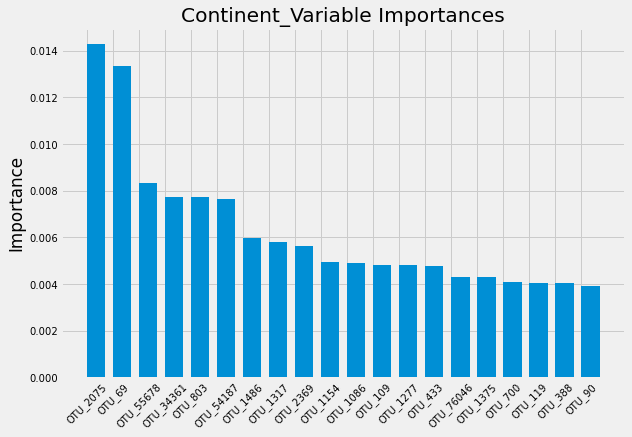

In [65]:
#这部分主要进行绘制直方图
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
 
%matplotlib inline
 
# Set the style
plt.style.use('fivethirtyeight')

fig1 = plt.figure(figsize=(9,6))

# list of x locations for plotting
x_values = list(range(1,len(Graph_Y_importance)+1))
print(x_values)
 
"""
rects =plt.bar(left = (0.2,1),height = (1,0.5),width = 0.2,align=”center”,yerr=0.000001)

其中left 表示 第一个柱子横坐标为0.2 第二个柱子的横坐标为1 
height 表示 第一个柱子高度为1 第二个柱子高度为0.5
width 可以用来调节柱子的宽度
yerr 表示用来防止直方图触顶


"""
    
    
# Make a bar chart
plt.bar(x_values, Graph_Y_importance, bottom =0, width = 0.7,align='edge',orientation = 'vertical')
 
"""
plt.xticks((0.2,1),('frst','second'), rotation)

rotation表示脚注旋转的度数
这句话是用来增加直方图的脚注

"""
plt.xticks(x_values, Graph_X_OTU, rotation=45)

# 设置刻度字体的大小 就是横纵坐标的大小
plt.tick_params(labelsize=10)  #刻度字体大小13

# Axis labels and title
plt.ylabel('Importance'); 
#plt.xlabel('Variable'); 
plt.title('Continent_Variable Importances'); 
plt.savefig('continent.jpg', dpi=300,bbox_inches='tight')
plt.show()